In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load dataset
folder = '/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/'

In [5]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/HIA303 Health Data Analytics/breast-cancer-wisconsin-imputed.csv')
data

,sample_id,cl_thcknss,size_cell_un,shape_cell_un,marg_adhesion,size_cell_single,bare_nucl,bl_chrmatn,nrml_nucleo,mitoses,class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
695,841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
696,888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
697,897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4


In [6]:
# adding column name to the respective columns
data.columns =['code_number', 'Clump_Thickness', 'Cell_Size_Uniformity', 'Cell Shape_Uniformity','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Chromatin','Normal_Nucleoli','Mitoses','Class']
# displaying the DataFrame
print(data)

     code_number  Clump_Thickness  Cell_Size_Uniformity  \
0        1000025              5.0                   1.0   
1        1002945              5.0                   4.0   
2        1015425              3.0                   1.0   
3        1016277              6.0                   8.0   
4        1017023              4.0                   1.0   
..           ...              ...                   ...   
694       776715              3.0                   1.0   
695       841769              2.0                   1.0   
696       888820              5.0                  10.0   
697       897471              4.0                   8.0   
698       897471              4.0                   8.0   

     Cell Shape_Uniformity  Marginal_Adhesion  Epithelial_Cell_Size  \
0                      1.0                1.0                   2.0   
1                      4.0                5.0                   7.0   
2                      1.0                1.0                   2.0   
3      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code_number            699 non-null    int64  
 1   Clump_Thickness        699 non-null    float64
 2   Cell_Size_Uniformity   699 non-null    float64
 3   Cell Shape_Uniformity  699 non-null    float64
 4   Marginal_Adhesion      699 non-null    float64
 5   Epithelial_Cell_Size   699 non-null    float64
 6   Bare_Nuclei            699 non-null    float64
 7   Chromatin              699 non-null    float64
 8   Normal_Nucleoli        699 non-null    float64
 9   Mitoses                699 non-null    float64
 10  Class                  699 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 60.2 KB


kNN Method (https://www.geeksforgeeks.org/ml-kaggle-breast-cancer-wisconsin-diagnosis-using-knn/)

In [8]:

#changing the value of the column id =1 as machine learning screening on id will not provide us insight
data.drop(['code_number'], 1, inplace=True)

<ipython-input-8-5663ad6b259f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['code_number'], 1, inplace=True)


In [9]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
# Define input and output
X = np.array(data.iloc[:, 1:])
y = np.array(data['Class'])
# Splitting data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)
# Using Sklearn
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [10]:
# Prediction Score
knn.score(X_test, y_test)

0.9696969696969697

In [11]:
# Performing Cross Validation
neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is  3 


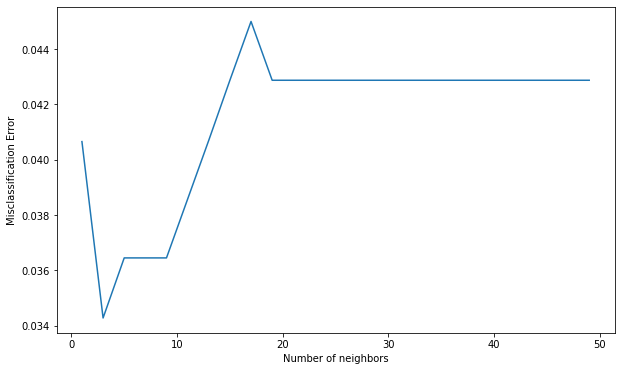

In [12]:
import matplotlib.pyplot as plt
# Misclassification error versus k
MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()